In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob


import pickle as pkl
import pandas as pd
import xarray as xr

import toolbox

In [2]:
# this is pretty useless. Just copy the chunk of code below and adjust parameters.

def load_bathy(data_path):
    shp_dict = {}
    files = glob(data_path + '*.shp')
    assert len(files) > 0
    files.sort()
    for f in files:
        depth = f.split('_')[-1].split('.')[0]
        nei = cart.io.shapereader.Reader(f)
        shp_dict[depth] = nei
    
    depths = [d for d in shp_dict.keys()][::-1]
    colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
    cmap = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)
        
    return shp_dict, depths, colors, cmap

In [3]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

In [6]:
shp_dict

{'10000': <cartopy.io.shapereader.FionaReader at 0x7f31086a17f0>,
 '9000': <cartopy.io.shapereader.FionaReader at 0x7f3108433f40>,
 '8000': <cartopy.io.shapereader.FionaReader at 0x7f310868c760>,
 '7000': <cartopy.io.shapereader.FionaReader at 0x7f3108c18400>,
 '6000': <cartopy.io.shapereader.FionaReader at 0x7f310868c4f0>,
 '5000': <cartopy.io.shapereader.FionaReader at 0x7f310868c520>,
 '4000': <cartopy.io.shapereader.FionaReader at 0x7f3108627400>,
 '3000': <cartopy.io.shapereader.FionaReader at 0x7f3108630a90>,
 '2000': <cartopy.io.shapereader.FionaReader at 0x7f31085b8250>,
 '1000': <cartopy.io.shapereader.FionaReader at 0x7f30e59c7820>,
 '200': <cartopy.io.shapereader.FionaReader at 0x7f30e5a62910>,
 '0': <cartopy.io.shapereader.FionaReader at 0x7f30e5795a60>}

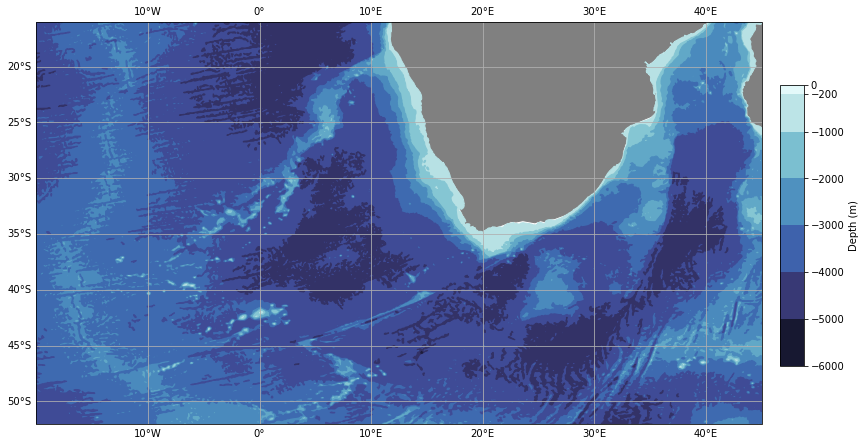

In [4]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-20, 45, -52, -16), crs=ccrs.PlateCarree())

i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(), crs=ccrs.PlateCarree(), color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

axi = fig.add_axes([0.92,0.35,0.025,0.3])

norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)')


In [8]:
moi_bathy = xr.load_dataset("/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc")

In [9]:
moi_bathy

<xarray.Dataset>
Dimensions:     (y: 3059, x: 4322)
Dimensions without coordinates: y, x
Data variables:
    nav_lon     (y, x) float32 72.92 73.0 73.08 73.17 ... 73.0 73.0 73.0 73.0
    nav_lat     (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
    Bathymetry  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mask        (y, x) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Title:      Bathymetry ORCA12
    Treatment:  correct bathy
    Comment:    Version V3.2

In [21]:
np.digitize(-30 , moi_bathy['nav_lat'][:,0])

ValueError: bins must be monotonically increasing or decreasing

In [20]:
digitize = moi_bathy['nav_lat'][:,0]

<xarray.DataArray 'nav_lat' (y: 3059)>
array([-77.010475, -76.99173 , -76.97295 , ...,  49.99825 ,  49.999176,
        49.99825 ], dtype=float32)
Dimensions without coordinates: y

In [19]:
moi_bathy.nav_lat[:,0]

<xarray.DataArray 'nav_lat' (y: 3059)>
array([-77.010475, -76.99173 , -76.97295 , ...,  49.99825 ,  49.999176,
        49.99825 ], dtype=float32)
Dimensions without coordinates: y

In [12]:
w = moi_bathy.where(moi_bathy.nav_lat == 49.99825)

In [15]:
w['nav_lon']

<xarray.DataArray 'nav_lon' (y: 3059, x: 4322)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [73.00011,      nan, 72.99989, ...,      nan, 73.00011,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [72.99989,      nan, 73.00011, ...,      nan, 72.99989,      nan]],
      dtype=float32)
Dimensions without coordinates: y, x

In [11]:
sim = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t3650_diff-False.nc')

In [13]:
sim5170 = toolbox.stuck_particles_mask(sim)

In [15]:
plt.rcParams.update({'font.size': 13})

Text(0.5, 1.0, '10 years before sampling')

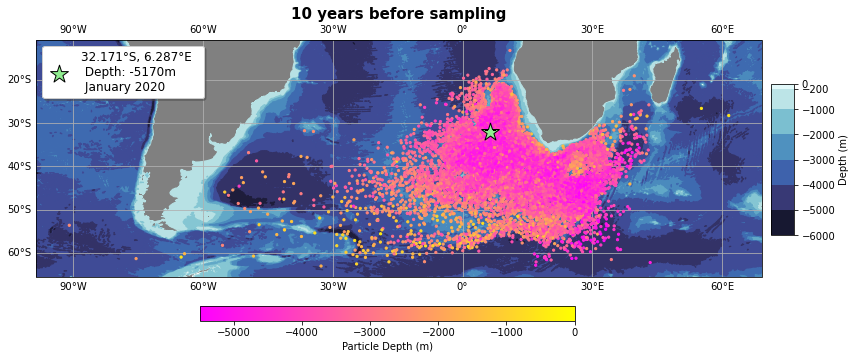

In [15]:
max_depth = -5500
min_depth = 0 

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim5170['lon'][:,-1], sim5170['lat'][:,-1], zorder=4, 
           c=-sim5170['z'][:,-1], s=5, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.18, 0.4, 0.03])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/revers.png')

In [13]:
#ANIMATION

min_depth = -np.max(sim['z'].values)
max_depth = -np.min(sim['z'].values)

for k, frame in enumerate(range(300, -1, -2)):

    fig = plt.figure(figsize=(15,13))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())

    i = 0

    for depth in depths[:8]:
        ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
        i+=1

    ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='LAND',scale='110m'),color='grey',
                  zorder=0)
  
    gl = ax.gridlines(draw_labels=True)
    gl.right_labels = False


    axi = fig.add_axes([0.91,0.35,0.025,0.3])
    norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
    cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
            boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
            ticks=-np.array(depths).astype(int),
            spacing='proportional',
            extend='neither',
            label='Depth (m)'
            )

    ax.scatter(6.287, -32.171, marker='*',
               zorder=5, color='lightgreen', 
               label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
               s=350,
              edgecolors='black')
    ax.legend(loc='upper left', shadow=True, fontsize=12)

    im = ax.scatter(sim['lon'][:,frame], sim['lat'][:,frame], zorder=4, 
               c=-sim['z'][:,frame], s=2, cmap='spring_r', 
                    vmax=max_depth, vmin=min_depth)
    ax.legend(loc='upper left', shadow=True, fontsize=12)
    ax.text(17, -30, 'SOUTH AFRICA', rotation=-59, fontsize=15, color='lightgray')
    
    bar_ax = fig.add_axes([0.3, 0.18, 0.4, 0.03])
#     bar_ax = fig.add_axes([0.3, 0.22, 0.4, 0.03])
    fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle depth (m)')
    ax.text(12.2, -39.2, f'{frame:03d} days before sampling', 
            c='gold', fontsize=15, weight='bold')
    plt.savefig(f'../figs/anim2/frame-{k:03d}', facecolor=(1,1,1,1))
    plt.close()

In [406]:
sim2 = xr.load_dataset('../data/simulations/backtrack_loc0.nc')

In [407]:
sim2

<xarray.Dataset>
Dimensions:     (obs: 366, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time        (traj, obs) datetime64[ns] 2010-12-20T12:00:00 ... 2009-12-20...
    lat         (traj, obs) float64 -32.13 -31.92 -31.66 ... -33.24 -33.21
    lon         (traj, obs) float64 -6.325 -6.551 -6.686 ... 8.814 9.173 9.452
    z           (traj, obs) float64 70.0 69.6 68.71 67.52 ... 13.77 13.77 13.54
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

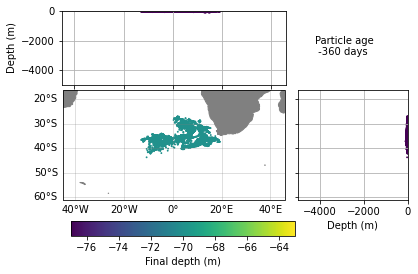

In [409]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Depth (m)')
ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Depth (m)')
ax_lat.set_xlim(-5000, 0)
ax_bar = plt.subplot(gs[2, 0])
ax_bar.axis('off')

ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')
ax_lon.text(58,-3000, f'Particle age \n -{n_day} days')

size_point = 0.7

im = ax.scatter(sim2['lon'][:,n_day], sim2['lat'][:,n_day], c=-sim2['z'][:,0], s=size_point)
ax_lon.scatter(sim2['lon'][:,n_day], -sim2['z'][:,n_day], c=-sim2['z'][:,0], s=size_point)
ax_lat.scatter(-sim2['z'][:,n_day], sim2['lat'][:,n_day], c=-sim2['z'][:,0], s=size_point)

bar_ax = fig.add_axes([0.12, 0.12, 0.52, 0.05])
plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Final depth (m)')


In [410]:
sim3 = xr.load_dataset('../data/simulations/backtrack_loc0_5000m.nc')

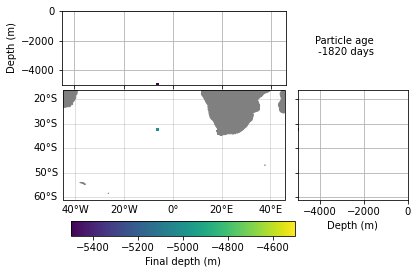

In [412]:
frame = 0
n_day = 1820

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Depth (m)')
ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Depth (m)')
ax_lat.set_xlim(-5000, 0)
ax_bar = plt.subplot(gs[2, 0])
ax_bar.axis('off')

ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')
ax_lon.text(58,-3000, f'Particle age \n -{n_day} days')

size_point = 0.7

im = ax.scatter(sim3['lon'][:,n_day], sim3['lat'][:,n_day], c=-sim3['z'][:,0], s=size_point)
ax_lon.scatter(sim3['lon'][:,n_day], -sim3['z'][:,n_day], c=-sim3['z'][:,0], s=size_point)
ax_lat.scatter(-sim3['z'][:,n_day], sim3['lat'][:,n_day], c=-sim3['z'][:,0], s=size_point)

bar_ax = fig.add_axes([0.12, 0.12, 0.52, 0.05])
plt.colorbar(im, cax=bar_ax, orientation='horizontal', label='Final depth (m)')


# C-grid plots

In [108]:
cufields = xr.open_dataset('../data/NEMO/ORCA0083-N06_20070818d05U.nc')
cvfields = xr.open_dataset('../data/NEMO/ORCA0083-N06_20070818d05V.nc')    

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [120]:
indices = {'lat': range(750, 1300), 'lon': range(2900, 4000)}

In [140]:
lons = cufields['nav_lon'][0,indices['lon']].values
lats = cufields['nav_lat'][indices['lat'],0].values

In [141]:
x,y = np.meshgrid(lons, lats)

In [131]:
cvfields['nav_lon'][0,indices['lon']]

<xarray.DataArray 'nav_lon' (x: 1100)>
array([-45.416668, -45.333332, -45.25    , ...,  46.      ,  46.083332,
        46.166668], dtype=float32)
Coordinates:
    nav_lat  (x) float32 ...
    nav_lon  (x) float32 ...
Dimensions without coordinates: x
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    nav_model:      grid_V

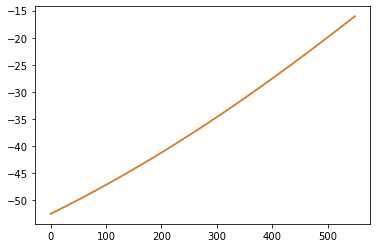

In [134]:
plt.plot(cufields['nav_lat'][indices['lat'],0])
plt.plot(cvfields['nav_lat'][indices['lat'],0])

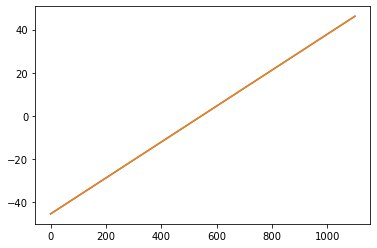

In [133]:
plt.plot(cufields['nav_lon'][0,indices['lon']])
plt.plot(cvfields['nav_lon'][0,indices['lon']])

In [55]:


xu_corners, yu_corners = np.meshgrid(np.arange(cufields['x'].values[0], cufields['x'].values[-1]+1, 1),
                np.arange(cufields['y'].values[0]-0.5, cufields['y'].values[-1]+0.5, 1))
xv_corners, yv_corners = np.meshgrid(np.arange(cvfields['x'].values[0]-0.5, cvfields['x'].values[-1]+0.5, 1),
                np.arange(cvfields['y'].values[0], cvfields['y'].values[-1]+1, 1))
cx_centers, cy_centers = np.meshgrid(np.arange(cvfields['x'].values[0]-0.5, cvfields['x'].values[-1]+1.5, 1),
                np.arange(cvfields['y'].values[0]-0.5, cvfields['y'].values[-1]+1.5, 1))
fx_corners, fy_corners = np.meshgrid(np.arange(cufields['x'].values[0]-1, cufields['x'].values[-1]+1, 1),
                np.arange(cufields['y'].values[0]-1, cufields['y'].values[-1]+1, 1))
c_cells = np.zeros((len(cufields['y']),len(cufields['x'])))



/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'vo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauvo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [105]:
cufields['nav_lon'][0,:]

<xarray.DataArray 'nav_lon' (x: 4322)>
array([72.916664, 73.      , 73.083336, ..., 72.833336, 72.916664, 73.      ],
      dtype=float32)
Coordinates:
    nav_lat  (x) float32 -77.01 -77.01 -77.01 -77.01 ... -77.01 -77.01 -77.01
    nav_lon  (x) float32 72.92 73.0 73.08 73.17 73.25 ... 72.75 72.83 72.92 73.0
Dimensions without coordinates: x
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    nav_model:      grid_U

In [106]:
np.meshgrid(cufields['nav_lon'][:,0], cufields['nav_lat'][:,0])

[array([[72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        ...,
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ],
        [72.916664, 72.916664, 72.916664, ..., 73.00011 , 73.      ,
         72.9998  ]], dtype=float32),
 array([[-77.010475, -77.010475, -77.010475, ..., -77.010475, -77.010475,
         -77.010475],
        [-76.99173 , -76.99173 , -76.99173 , ..., -76.99173 , -76.99173 ,
         -76.99173 ],
        [-76.97295 , -76.97295 , -76.97295 , ..., -76.97295 , -76.97295 ,
         -76.97295 ],
        ...,
        [ 49.99825 ,  49.99825 ,  49.99825 , ...,  49.99825 ,  49.99825 ,
          49.99825 ],
        [ 49.999176,  49.999176, 

In [98]:
cufields['z'].values[:,0]

KeyError: 'z'

In [95]:
cufields['nav_lon'].values[0].shape

(4322,)

In [89]:
cvfields['nav_lat'].values[:,0]

array([-77.010475, -76.99173 , -76.97295 , ...,  49.99825 ,  49.999176,
        49.996487], dtype=float32)

In [83]:
np.arange(cufields['x'].values[0], cufields['x'].values[-1]+1, 1)

array([   0,    1,    2, ..., 4319, 4320, 4321])

In [81]:
cufields['x'].values

array([   0,    1,    2, ..., 4319, 4320, 4321])

In [58]:
xu_corners[0,:].shape

(4322,)

In [59]:
yu_corners[:,0].shape

(3059,)

In [60]:
cu_zeros.shape

(75, 3059, 4322)

In [75]:
cu_zeros = np.nan_to_num(cufields['uo'][0])                                      # Velocity field with NaN -> zero to be able to use in interp2d
f = interpolate.interp2d(xu_corners[0,:],yu_corners[:,0],cu_zeros[0])                # Interpolator

cu_centers = f(cx_centers[0,:],cy_centers[:,0])                               # Velocity field interpolated on the T-points - center

cudmask = np.ma.masked_values(cu_centers,0)                      

In [76]:
cu_centers.shape

(3060, 4323)

In [68]:
fx_corners.shape

(3060, 4323)

In [69]:
fy_corners.shape

(3060, 4323)

In [71]:
cudmask.shape

(3059, 4322)

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


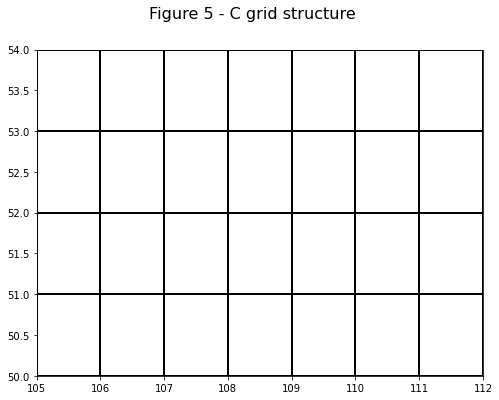

In [77]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('Figure 5 - C grid structure', fontsize=16)
ax1=plt.axes()

ax1.set_xlim(105, 112)
ax1.set_ylim(50, 54)
ax1.pcolormesh(fx_corners,fy_corners,cudmask,cmap='Blues',edgecolors='k',linewidth=1)
# ax1.scatter(xu_corners,yu_corners, s=80,c=cufields['uo'][0],cmap='seismic',
#             vmin=-0.1,vmax=0.1,edgecolor='k', label = 'U')
# # ax1.scatter(xv_corners,yv_corners, s=80,c=cvfields['vo'][0],cmap='PRGn',
#             vmin=-0.1,vmax=0.1,edgecolor='k', label = 'V')
# ax1.scatter(cx_centers,cy_centers, s=80,c='orange',edgecolor='k', label = 'T')
# ax1.quiver(xu_corners,yu_corners,cufields['uo'][0],np.zeros(xu_corners.shape),
#            angles='xy', scale_units='xy', scale=0.1, width=0.007)
# ax1.quiver(xv_corners,yv_corners,np.zeros(xv_corners.shape),cvfields['vo'][0],
#            angles='xy', scale_units='xy', scale=0.3, width=0.007)

# custom_lines = [Line2D([0], [0], marker='o', color='r',lw=0),
#                 Line2D([0], [0], marker='o', color='g', lw=0),
#                 Line2D([0], [0], marker='o', color='orange', lw=0)]

# ax1.legend(custom_lines, ['U', 'V', 'T'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [14]:
from glob import glob

In [18]:
sorted(glob('../data/MOi/psy4v3r1-daily_V*.nc'))

['../data/MOi/psy4v3r1-daily_V_2019-12-02.nc']

In [27]:
model = xr.load_dataset('../data/MOi/psy4v3r1-daily_U_2019-12-02.nc')

In [28]:
model

<xarray.Dataset>
Dimensions:       (deptht: 50, x: 4322, y: 3059)
Coordinates:
    nav_lon       (y, x) float32 72.96 73.04 73.12 73.21 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
  * x             (x) int32 1 2 3 4 5 6 7 ... 4316 4317 4318 4319 4320 4321 4322
  * y             (y) int32 1 2 3 4 5 6 7 ... 3053 3054 3055 3056 3057 3058 3059
    time_counter  datetime64[ns] 2019-12-02T12:00:00
  * deptht        (deptht) float64 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Data variables:
    sotkeavmu1    (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    sotkeavmu15   (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    sotkeavmu30   (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    sotkeavmu50   (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    vozocrtx      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.0
    file_name:    ORCA12_LIM-T00_y2021m10d11_gridU.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2021-OCT-17 18:25:32 GMT-0000
    references:   http://www.mercator-ocean.eu

In [23]:
model['nav_lon']

<xarray.DataArray 'nav_lon' (y: 3059, x: 4322)>
array([[72.916664, 73.      , 73.083336, ..., 72.833336, 72.916664,
        73.      ],
       [72.916664, 73.      , 73.083336, ..., 72.833336, 72.916664,
        73.      ],
       [72.916664, 73.      , 73.083336, ..., 72.833336, 72.916664,
        73.      ],
       ...,
       [73.00011 , 73.      , 72.99989 , ..., 73.00015 , 73.00011 ,
        73.      ],
       [73.      , 73.      , 73.      , ..., 73.      , 73.      ,
        73.      ],
       [72.99989 , 73.      , 73.00011 , ..., 72.99985 , 72.99989 ,
        73.      ]], dtype=float32)
Coordinates:
    nav_lon       (y, x) float32 72.92 73.0 73.08 73.17 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
  * x             (x) int32 1 2 3 4 5 6 7 ... 4316 4317 4318 4319 4320 4321 4322
  * y             (y) int32 1 2 3 4 5 6 7 ... 3053 3054 3055 3056 3057 3058 3059
    time_counter  datetime64[ns] 2019-12-02T12:00:00
Attributes:
    units:          degrees_east
    valid_min:      -179.99998963909385
    valid_max:      180.0
    long_name:      Longitude
    nav_model:      Default grid
    standard_name:  longitude

In [26]:
xr.load_dataset('../data/NEMO/coordinates.nc')

ValueError: unable to decode time units 'seconds since 0000-01-01 00:00:00' with "calendar 'gregorian'". Try opening your dataset with decode_times=False or installing cftime if it is not installed.